In [1]:
def read_book(title_path):
    """Read a book and return it as a string."""
    with open(title_path, "r", encoding="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text

def count_words(text):
    """Count the number of times each word occurs in text (str). Return dictionary
    where keys are unique words and values are word counts. Skip punctuation."""
    text = text.lower()
    skips = [".", ",", ";", ":", "'", '"']
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = {}
    for word in text.split(" "):
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts

def word_stats(word_counts):
    """Return number of unique words and word frequencies."""
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

import os
book_dir = "./Books"

import pandas as pd
stats = pd.DataFrame(columns = ("language", "author", "title", "length", "unique"))
title_num = 1

for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
            stats.loc[title_num] = language, author.capitalize(), title.replace(".txt", ""), sum(counts), num_unique
            title_num += 1

./Books/English/shakespeare/A Midsummer Night's Dream.txt
./Books/English/shakespeare/Hamlet.txt
./Books/English/shakespeare/Macbeth.txt
./Books/English/shakespeare/Othello.txt
./Books/English/shakespeare/Richard III.txt
./Books/English/shakespeare/Romeo and Juliet.txt
./Books/English/shakespeare/The Merchant of Venice.txt
./Books/French/chevalier/L'enfer et le paradis de l'autre monde.txt
./Books/French/chevalier/L'åle de sable.txt
./Books/French/chevalier/La capitaine.txt
./Books/French/chevalier/La fille des indiens rouges.txt
./Books/French/chevalier/La fille du pirate.txt
./Books/French/chevalier/Le chasseur noir.txt
./Books/French/chevalier/Les derniers Iroquois.txt
./Books/French/de Maupassant/Boule de Suif.txt
./Books/French/de Maupassant/Claire de Lune.txt
./Books/French/de Maupassant/Contes de la Becasse.txt
./Books/French/de Maupassant/L'inutile beautÇ.txt
./Books/French/de Maupassant/La Main Gauche.txt
./Books/French/de Maupassant/La Maison Tellier.txt
./Books/French/de Mau

In [4]:
stats.length

1       16103
2       28551
3       16874
4       26590
5       48315
        ...  
98     128630
99      21440
100    107303
101    195771
102     30567
Name: length, Length: 102, dtype: object

In [5]:
stats.unique

1       4345
2       6776
3       4780
4       5898
5       5449
       ...  
98     29300
99      7836
100    27644
101    40665
102     9700
Name: unique, Length: 102, dtype: object

In [7]:
import matplotlib.pyplot as plt

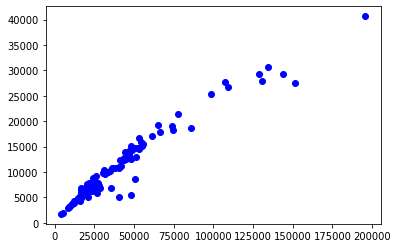

In [8]:
plt.plot(stats.length, stats.unique, "bo");

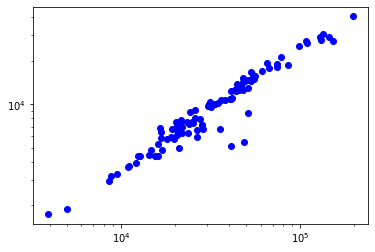

In [10]:
plt.loglog(stats.length, stats.unique, "bo");

In [11]:
stats[stats.language == "English"]

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449
6,English,Shakespeare,Romeo and Juliet,40776,5118
7,English,Shakespeare,The Merchant of Venice,20949,4978


In [12]:
stats[stats.language == "French"]

,language,author,title,length,unique
8,French,Chevalier,L'enfer et le paradis de l'autre monde,40827,10831
9,French,Chevalier,L'åle de sable,73801,18989
10,French,Chevalier,La capitaine,46306,13083
11,French,Chevalier,La fille des indiens rouges,66621,17875
12,French,Chevalier,La fille du pirate,52519,14649
13,French,Chevalier,Le chasseur noir,51341,12945
14,French,Chevalier,Les derniers Iroquois,55565,15583
15,French,De maupassant,Boule de Suif,35905,10725
16,French,De maupassant,Claire de Lune,25975,8076
17,French,De maupassant,Contes de la Becasse,34723,10210


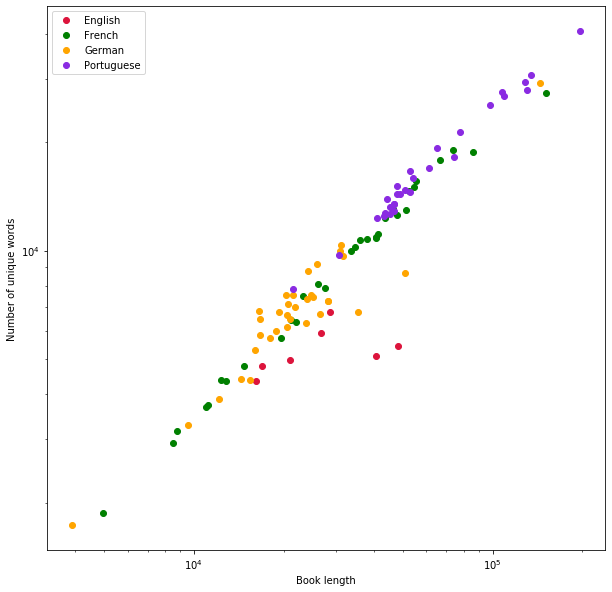

In [13]:
plt.figure(figsize = (10, 10))
subset = stats[stats.language == 'English']
plt.loglog(subset.length, subset.unique, "o", label = "English", color = "crimson")
subset = stats[stats.language == 'French']
plt.loglog(subset.length, subset.unique, "o", label = "French", color = "green")
subset = stats[stats.language == 'German']
plt.loglog(subset.length, subset.unique, "o", label = "German", color = "orange")
subset = stats[stats.language == 'Portuguese']
plt.loglog(subset.length, subset.unique, "o", label = "Portuguese", color = "blueviolet")
plt.legend()
plt.xlabel("Book length")
plt.ylabel("Number of unique words")
plt.savefig("lang_plot.pdf")

In [18]:
# stats is a Pandas dataframe as defined in Video 3.2.6. Which of the following options are valid ways to access the column "length" in this dataframe? (Select all that apply.)
# stats.length
# stats["length"]

In [19]:
# stats is a Pandas dataframe as defined in Video 3.2.6. How can you select only the rows where the language is French?
# stats[stats.language == "French"]